## Numeric Integration

What does the reaction progress of enzyme kinetics look like over a long stretch of time, far past the initial rate from which we have not yet dared stray? The math is similar to the case of the steady-state kinetic scheme above. However, in the Michaleis-Menten (MM) system, one of the reactants, the enzyme, is present at limiting quanties ($[E]_t \ll [S]_t$) and this case gives rise to the famous MM equation.

$$-\frac{d}{dt}[S] = k_{cat}[E]_t\frac{[S]_t}{K_M+[S]_t}$$

This equation can be integrated analytically using advanced mathematical methods that you will likely never care to learn. I certainly have no clue how to integrate anything but the simplest equations. So, yes, you will never use calculus again in your life but only because others have done the calculus for you already. Understanding the basics of calculus is important if you are to properly stand on the shoulders of mathematicians. The analytical integration was demonstrated in the previous notebook.

In this notebook will not use analytical methods but instead use the numerical algorithms encapsulated the Python tools. We will use `scipy.integration.odeint()`.

## Using *odient*

The `scipy.integration.odeint()` function will perform a numeric integration of ordinary differential equations. It is simpler to set up than the analytical integration and, in well behaved cases, is very acurate. Let us perform a numerical integration of the MM system. We can then compare the results with the analytical method.

If we know the value of [S] at a given moment in time then we can easily calculate the rate of change using the above equation. There is only one place where we know the substrate concentration for sure and that is at time zero. So we start there, calculate the rate of change, calculate the change after an infinitesimal amount of time and then start again with the new concentration and repeat endlessly. Obviously there are mathematical approaches to this and they all use various methods to minimize the error caused when the time step used is anything greater than $\frac{1}{\infty}$.

So we know that the numerical approach should be close to the true answer but can never be exact. The analytical method is exact but, as we saw, is very difficult with some kinds of equations. The code below defines a function for the rate of change in copncentration of substrate according to the MM equation. Then we use `scipy.integration.odeint()` to calculate the concentration of substrate over time using numerical integration methods.

12000


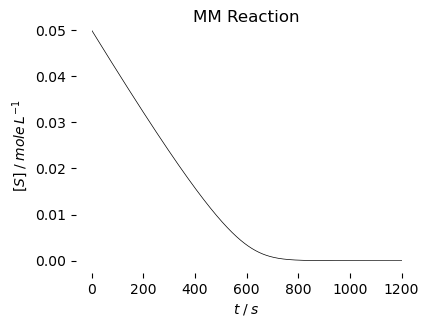

In [13]:
#######################
### import packages ###
#######################

import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

def rates(c, t, E, kcat, Km):
    return -kcat * E * c / (c + Km)


############################################
### Create a function that describes the ###
### rates of all reactions in the system ###
############################################

E_conc = 1e-6
KM_value = 0.005          ### set KM value
kcat_value = 1E2          ### set Vmax value
S0_value = .05            ### set initial substrate concentration value

Vmax_value = E_conc * kcat_value

time_end = 1200           ### The end time
n_points = 100            ### number of points - increase if needed



#########################################
### Create series of time points      ###
#########################################

dt = .1                                    ### time step, delta t
tmax = time_end                            ### max time, s
t = np.linspace(0, tmax, num=int(tmax/dt)) ### time vector (list of time points)

xmax = time_end           ### change these as you wish
ymax = S0_value

##########################
### integrate
##########################

initial = S0_value
cc = odeint(rates, initial, t, args=(E_conc, kcat_value, KM_value))

##########################
### plot x and y data
##########################

x = t; xmax = tmax
y = cc

plt.rcdefaults()     ### resets the plot defaults so we always start in the same place
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(4,3))  

ax.plot( x, y,
         linestyle = '-',            ### use a line between points
         linewidth='0.5',            ### make the line thin
         color = 'black',            ### the line is black
         zorder = 0                  ### everything is in layer 0 (the bottom layer in this case)
        )
ax.set( xlabel= r"$t\;/\;s$", 
        ylabel=r"$[S] \; / \; mole\,L^{-1}$",
        title = "MM Reaction",
        xlim=[0, xmax],                  
        ylim=[-0.0001, ymax]      
       )

ax.spines[['top','right','bottom','left']].set_visible(False)   ### Make all spines invisible
ax.spines[['left','bottom']].set_position(('axes',-0.05))       ### space spines a little away from 'axes' (plot box)

#########################################
### Output the plot
#########################################

plt.savefig("plot.pdf", bbox_inches='tight')     ### export the plot as this
plt.show() 